# **Détecteur des émotions par les expressions faciales**

Un détecteur des émotions permet de détecter et d’analyser les émotions capturées à un instant t à partir d’une simple photo où une vidéo. Ce service peut identifier jusqu’à 7 émotions : la colère, le dégoût, la peur, le bonheur, neutre, la tristesse et la surprise. Vous allez construire un modèle IA qui permet de réaliser cette tâche sur des images et des vidéos.

Contexte du projet

Les expressions du visage peuvent naturellement servirent à évaluer la satisfaction d’un client aux prises avec un service après-vente ou à face à un produit récemment acquis dont il s’agit de comprendre le fonctionnement. On peut encore mentionner les applications suivantes :

    La détection d’un manque d’attention chez un conducteur en vue d’augmenter la sécurité de la conduite.
    L’évaluation du niveau de stress de passagers à l’atterrissage ou à l’arrivé en gare ou la détection de comportements suspects.
    L’humanisation des robots dans leurs interactions avec les humains dont ils prendraient en compte l’état psychique.


Modalités pédagogiques

Le projet se fait en groupe (2 ou 3 personnes).
Critères de performance

Le code doit bien être structuré, avec des explications sur le choix de l'architecture utilisée dans le modèle et une évaluation de la performance du modèle.
Modalités d'évaluation

    Un rapport sur le projet réalisé qui explique les différentes étapes du code

    Description des données

    Présentation de l'architecture utilisée

    Conclusion (avantages et inconvénients, concurrents, recommandations…)

    Revue de code avec le formateur.

    Après la finalisation du projet avec son rapport, une présentation ppt pourra être demandé des différentes étapes du projet, une explication du code et une demo.

Livrables

- Un lien Github vers le code python de l'interface graphique. 

- Cette interface permet de reconnaitre l'émotion d'une personne à travers une image où bien une Webcam.

- Elle permet aussi d'associer un emoji qui représente l'émotion de la personne dans l'image/vidéo

- Finalement, elle va lui poser des questions si l'émotion est négative (ex. pourquoi es-tu triste, ...), si l'émotion est positive elle va la féliciter.

cv_createsample

https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

https://analyticsindiamag.com/my-first-cnn-project-emotion-detection-using-convolutional-neural-network-with-tpu/

In [1]:
emotion = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,
           'sad': 4, 'surprise': 5, 'neutral': 6}

## Import des  librairies 

In [38]:
#importation des bibliothèques
import numpy as np
import pandas as pd
import argparse
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
from sklearn.metrics import accuracy_score

# Description du jeu de données

In [ ]:
Nous avons 2 repertoires de données :
    - 1 jeu de données test
    - 1 jeu de données d'entrainement
A l'intérieur de chaque répertoire, les émotions sont classées en 7 émotions ()

In [41]:
#afficher le contenu de chaque répertoire

input_path = 'C:/Users/utilisateur/Google Drive/microsoft_ia/Google Drive/projets/ia/Reconnaissance d\'émotions/Data/train'

photos ={}
for numero, emotion in enumerate(input_path):
    photos[numero] = emotion

print(photos)

{0: 'C', 1: ':', 2: '/', 3: 'U', 4: 's', 5: 'e', 6: 'r', 7: 's', 8: '/', 9: 'u', 10: 't', 11: 'i', 12: 'l', 13: 'i', 14: 's', 15: 'a', 16: 't', 17: 'e', 18: 'u', 19: 'r', 20: '/', 21: 'G', 22: 'o', 23: 'o', 24: 'g', 25: 'l', 26: 'e', 27: ' ', 28: 'D', 29: 'r', 30: 'i', 31: 'v', 32: 'e', 33: '/', 34: 'm', 35: 'i', 36: 'c', 37: 'r', 38: 'o', 39: 's', 40: 'o', 41: 'f', 42: 't', 43: '_', 44: 'i', 45: 'a', 46: '/', 47: 'G', 48: 'o', 49: 'o', 50: 'g', 51: 'l', 52: 'e', 53: ' ', 54: 'D', 55: 'r', 56: 'i', 57: 'v', 58: 'e', 59: '/', 60: 'p', 61: 'r', 62: 'o', 63: 'j', 64: 'e', 65: 't', 66: 's', 67: '/', 68: 'i', 69: 'a', 70: '/', 71: 'R', 72: 'e', 73: 'c', 74: 'o', 75: 'n', 76: 'n', 77: 'a', 78: 'i', 79: 's', 80: 's', 81: 'a', 82: 'n', 83: 'c', 84: 'e', 85: ' ', 86: 'd', 87: "'", 88: 'é', 89: 'm', 90: 'o', 91: 't', 92: 'i', 93: 'o', 94: 'n', 95: 's', 96: '/', 97: 'D', 98: 'a', 99: 't', 100: 'a', 101: '/', 102: 't', 103: 'r', 104: 'a', 105: 'i', 106: 'n'}


In [42]:
#afficher le contenu de chaque répertoire

input_path = 'C:/Users/utilisateur/Google Drive/microsoft_ia/Google Drive/projets/ia/Reconnaissance d\'émotions/Data/test'

photos ={}
for numero, emotion in enumerate(input_path):
    photos[numero] = emotion

print(photos)

{0: 'C', 1: ':', 2: '/', 3: 'U', 4: 's', 5: 'e', 6: 'r', 7: 's', 8: '/', 9: 'u', 10: 't', 11: 'i', 12: 'l', 13: 'i', 14: 's', 15: 'a', 16: 't', 17: 'e', 18: 'u', 19: 'r', 20: '/', 21: 'G', 22: 'o', 23: 'o', 24: 'g', 25: 'l', 26: 'e', 27: ' ', 28: 'D', 29: 'r', 30: 'i', 31: 'v', 32: 'e', 33: '/', 34: 'm', 35: 'i', 36: 'c', 37: 'r', 38: 'o', 39: 's', 40: 'o', 41: 'f', 42: 't', 43: '_', 44: 'i', 45: 'a', 46: '/', 47: 'G', 48: 'o', 49: 'o', 50: 'g', 51: 'l', 52: 'e', 53: ' ', 54: 'D', 55: 'r', 56: 'i', 57: 'v', 58: 'e', 59: '/', 60: 'p', 61: 'r', 62: 'o', 63: 'j', 64: 'e', 65: 't', 66: 's', 67: '/', 68: 'i', 69: 'a', 70: '/', 71: 'R', 72: 'e', 73: 'c', 74: 'o', 75: 'n', 76: 'n', 77: 'a', 78: 'i', 79: 's', 80: 's', 81: 'a', 82: 'n', 83: 'c', 84: 'e', 85: ' ', 86: 'd', 87: "'", 88: 'é', 89: 'm', 90: 'o', 91: 't', 92: 'i', 93: 'o', 94: 'n', 95: 's', 96: '/', 97: 'D', 98: 'a', 99: 't', 100: 'a', 101: '/', 102: 't', 103: 'e', 104: 's', 105: 't'}


# Description du jeu de donneés

In [3]:
#initialisation des générateurs train et test

train_dir = 'data/train'
val_dir = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 20091 images belonging to 7 classes.
Found 7123 images belonging to 7 classes.


In [4]:
emotion = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,
           'sad': 4, 'surprise': 5, 'neutral': 6}

# Création du modèle

In [5]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# test 1:

# Compilation du modèle

In [6]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
epochs = 10
history = model.fit(train_generator, batch_size=64, epochs=epochs, validation_data=(validation_generator))

Epoch 1/10
314/314 [==============================] - 235s 745ms/step - loss: 1.7925 - accuracy: 0.2652 - val_loss: 1.7106 - val_accuracy: 0.3021
Epoch 2/10
314/314 [==============================] - 222s 708ms/step - loss: 1.5345 - accuracy: 0.4308 - val_loss: 1.4202 - val_accuracy: 0.4551
Epoch 3/10
314/314 [==============================] - 242s 770ms/step - loss: 1.2893 - accuracy: 0.5325 - val_loss: 1.3071 - val_accuracy: 0.4940
Epoch 4/10
314/314 [==============================] - 251s 800ms/step - loss: 1.2011 - accuracy: 0.5641 - val_loss: 1.3019 - val_accuracy: 0.4956
Epoch 5/10
314/314 [==============================] - 266s 846ms/step - loss: 1.1242 - accuracy: 0.5929 - val_loss: 1.2282 - val_accuracy: 0.5239
Epoch 6/10
314/314 [==============================] - 235s 746ms/step - loss: 1.0797 - accuracy: 0.6066 - val_loss: 1.1904 - val_accuracy: 0.5451
Epoch 7/10
314/314 [==============================] - 243s 775ms/step - loss: 1.0158 - accuracy: 0.6310 - val_loss: 1.1908 -

modele non performant

# test 2

# Visualisation des courbes de précisions et de perte

In [14]:
num_train = 20091
num_val = 7123
batch_size = 64
num_epoch = 50

In [15]:
# tracer les courbes de précision et de perte
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # résumer l'historique pour plus de précision (accuracy)
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # résumer l'historique pour plus de la perte (loss)
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

# Compilation et sauvegarde du modèle

Epoch 1/50
313/313 [==============================] - 206s 656ms/step - loss: 0.3418 - accuracy: 0.8804 - val_loss: 1.3674 - val_accuracy: 0.6030
Epoch 2/50
313/313 [==============================] - 206s 658ms/step - loss: 0.3369 - accuracy: 0.8796 - val_loss: 1.3994 - val_accuracy: 0.5970
Epoch 3/50
313/313 [==============================] - 204s 650ms/step - loss: 0.3222 - accuracy: 0.8884 - val_loss: 1.3932 - val_accuracy: 0.6030
Epoch 4/50
313/313 [==============================] - 205s 654ms/step - loss: 0.3238 - accuracy: 0.8869 - val_loss: 1.4200 - val_accuracy: 0.5988
Epoch 5/50
313/313 [==============================] - 203s 648ms/step - loss: 0.3215 - accuracy: 0.8877 - val_loss: 1.4211 - val_accuracy: 0.6008
Epoch 6/50
313/313 [==============================] - 206s 658ms/step - loss: 0.3137 - accuracy: 0.8875 - val_loss: 1.4011 - val_accuracy: 0.5976
Epoch 7/50
313/313 [==============================] - 208s 665ms/step - loss: 0.3075 - accuracy: 0.8916 - val_loss: 1.4126 -

<ipython-input-15-e3d78e701c3b>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-15-e3d78e701c3b>:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


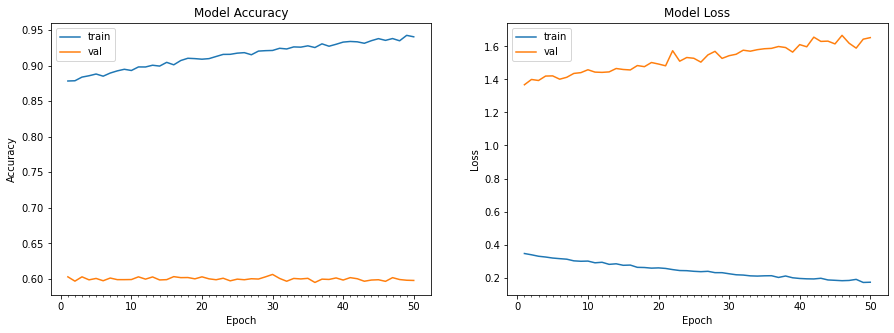

In [16]:



model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)
plot_model_history(model_info)
model.save('model.h5')



# Utilisation de Haarcascade pour la prédiction

In [47]:
# emotions will be displayed on your face from the webcam feed
model = load_model('model.h5')

# prevents openCL usage and unnecessary logging messages
cv2.ocl.setUseOpenCL(False)

# dictionary which assigns each label an emotion (alphabetical order)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# start the webcam feed
cap = cv2.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    print(emotion_dict[maxindex])
    #Chargement d'une image
    image = cv2.imread("emo/"+emotion_dict[maxindex]+".jpg")
    image = cv2.resize(image, (35,35))
    cv2.imshow('emo', image)
            

    
    cv2.imshow('Video', cv2.resize(frame,(960,720),interpolation = cv2.INTER_CUBIC))
    #pour sauvegarder une image
    #cv2.imwrite(x.png)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
#permet de libérer la mémoire une fois la fenêtre fermée
cv2.destroyAllWindows()

Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Sad
Neutral
Neutral
Neutral
Neutral
Neutral
Sad
Sad
Neutral
Neutral
Neutral
Sad
Sad
Sad
Surprised


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


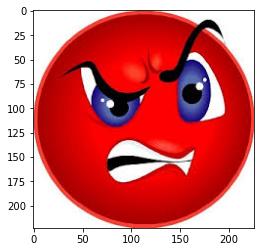

In [28]:
# emotions will be displayed on your face from the webcam feed
#model = load_model('model.h5')


#detec_visage_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread("emo/angry.jpg", 3)
#transformer une image de couleur en gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

visage = detec_visage_model.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in visage:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)









In [ ]:
Nous avons notre model qui fonctionne notamment grâce au fichier "haarcascade_frontalface_default.xml" cf le github 


In [1]:
import cv2
#lecture de l'image
img = cv2.imread("emo/angry.jpg", 3)
#NamedWindow pour afficher l'image
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
#met en attente la fenetre
cv2.waitKey(0)
#permet de libérer la mémoire une fois la fenêtre fermée
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
#lecture de l'image
img = cv2.imread("emo/angry.jpg", 3)
#transformer une image de couleur en gris
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,th=cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
#NamedWindow pour afficher l'image
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image',th)
#met en attente la fenetre
cv2.waitKey(0)
#permet de libérer la mémoire une fois la fenêtre fermée
cv2.destroyAllWindows()